In [6]:
import fiftyone as fo

# Delete the existing dataset
if fo.dataset_exists("circle-pond-2"):
    fo.delete_dataset("circle-pond-2")

# Now create your new dataset
dataset = fo.Dataset("circle-pond-2")

In [21]:
dataset_dir = r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/circle-pond-2/test/images"
#list all files in the dataset dir
print(len(os.listdir(dataset_dir)))


25


In [1]:
import os
import shutil

def copy_confusion_matrices(src_root, dest_dir):
    """Copy confusion matrix images from each 'val' directory to the destination directory."""
    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    # Iterate over each 'val' directory
    for val_dir in os.listdir(src_root):
        val_path = os.path.join(src_root, val_dir)
        if os.path.isdir(val_path):
            # Look for confusion matrix images
            for file_name in ['confusion_matrix.png']:
                src_file = os.path.join(val_path, file_name)
                if os.path.exists(src_file):
                    dest_file = os.path.join(dest_dir, f"{val_dir}_{file_name}")
                    shutil.copy(src_file, dest_file)
                    print(f"Copied {src_file} to {dest_file}")

# Example usage
source_root_directory = '/Users/gilbenor/Downloads/detect 8'
destination_directory = 'confs6'

copy_confusion_matrices(source_root_directory, destination_directory)

Copied /Users/gilbenor/Downloads/detect 8/val5/confusion_matrix.png to confs6/val5_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val2/confusion_matrix.png to confs6/val2_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val3/confusion_matrix.png to confs6/val3_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val4/confusion_matrix.png to confs6/val4_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val6/confusion_matrix.png to confs6/val6_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val8/confusion_matrix.png to confs6/val8_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val9/confusion_matrix.png to confs6/val9_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val7/confusion_matrix.png to confs6/val7_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val10/confusion_matrix.png to confs6/val10_confusion_matrix.png
Copied /Users/gilbenor/Downloads/detect 8/val/confusion_matrix

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import pytesseract

# Path to the uploaded files
file_paths = glob.glob("/mnt/data/val*_confusion_matrix.png")

# Function to extract text from confusion matrix images using OCR
def extract_confusion_matrix_values(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    lines = text.strip().split('\n')
    
    # Find numeric values in the extracted text
    values = []
    for line in lines:
        nums = [int(s) for s in line.split() if s.isdigit()]
        values.extend(nums)
    
    if len(values) >= 4:
        # Assuming order: TP, FP, FN, TN
        tp, fp, fn, tn = values[:4]
        return tp, fp, fn, tn
    else:
        return None

# Extract data from all matrices
results = {}
for file in file_paths:
    name = os.path.basename(file)
    values = extract_confusion_matrix_values(file)
    if values:
        tp, fp, fn, tn = values
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        results[name] = {
            'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

# Sort results by F1 score (best overall measure for classification)
best_model = sorted(results.items(), key=lambda x: x[1]['F1 Score'], reverse=True)

# Display best model and summary of metrics
best_model


In [ ]:
from ultralytics import RTDETR

model= RTDETR(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/detect/train/weights/best.pt")


for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    results = model.val(save_json=True, data=r"/Users/gilbenor/Downloads/circle pond.v23i.yolov8/data.yaml", plots=True,split='test',conf=threshold)
    print(f"threshold: {threshold}")
    print(results)

Ultralytics 8.3.91 🚀 Python-3.9.6 torch-2.0.1 CPU (Apple M4)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs


val: Scanning /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 2126.30it/s]

val: New cache created: /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:34<00:00, 18.84s/it]


                   all         79        561       0.87      0.783      0.833      0.346
Speed: 1.0ms preprocess, 1185.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Saving /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val4/predictions.json...
Results saved to /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val4
threshold: 0.1
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x34d3904f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01

val: Scanning /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:34<00:00, 18.88s/it]


                   all         79        561       0.87      0.783      0.833      0.346
Speed: 1.0ms preprocess, 1185.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Saving /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val5/predictions.json...
Results saved to /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val5
threshold: 0.2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x3469299a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01

val: Scanning /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:31<00:00, 18.21s/it]


                   all         79        561       0.87      0.783      0.833      0.346
Speed: 0.9ms preprocess, 1142.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Saving /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val6/predictions.json...
Results saved to /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val6
threshold: 0.3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x34ad3c340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01

val: Scanning /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:36<00:00, 19.36s/it]


                   all         79        561       0.87      0.783      0.833      0.346
Speed: 0.9ms preprocess, 1214.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Saving /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val7/predictions.json...
Results saved to /Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/runs/detect/val7
threshold: 0.4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x33ef7a520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01

val: Scanning /Users/gilbenor/Downloads/circle pond.v23i.yolov8/test/labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:41<01:01, 20.48s/it]

In [20]:
import fiftyone as fo
import os
import glob

# Set the dataset name
name = "circle-pond-2333"

# Set the dataset directory
dataset_dir = r"/Users/gilbenor/Downloads/circle pond.v20i.yolov8"

# The splits to load
splits = ["test", "valid","train"]


dataset = fo.Dataset(name,overwrite=True)
print(f"Created new dataset '{name}'")


#print dataset dir
print(len(dataset_dir))


def read_yolo_label(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    detections = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        detections.append(
            fo.Detection(
                label='ground_truth' , # Convert class_id to string
                bounding_box=[x_center - width/2, y_center - height/2, width, height]
            )
        )
    return detections

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    images_dir = os.path.join(split_dir, "images")
    labels_dir = os.path.join(split_dir, "labels")
    
    # Add images and labels
    for image_path in glob.glob(os.path.join(images_dir, "*")):
        image_name = os.path.basename(image_path)
        label_name = os.path.splitext(image_name)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        
        sample = fo.Sample(filepath=image_path)
        sample.tags.append(split)

        if os.path.exists(label_path):
            detections = read_yolo_label(label_path)
            sample["ground_truth"] = fo.Detections(detections=detections,label_field="ground_truth")
           
        #add sample to dataset
        dataset.add_sample(sample)
        print(f"Added {image_name} with label (if exists)")

print(f"\nDataset '{name}' now has {len(dataset)} samples")

# Print detailed information about the dataset
print("\nDataset Summary:")
print(dataset.summary())

# Print schema of the dataset
print("\nDataset Schema:")
for field_name, field_type in dataset.get_field_schema().items():
    print(f"{field_name}: {field_type}")

# If you want to examine a specific sample
if len(dataset) > 0:
    sample = dataset.first()
    print("\nFirst Sample Details:")
    print(sample)

    if "ground_truth" in sample:
        print("\nGround Truth for First Sample:")
        print(sample.ground_truth)
    else:
        print("\nWarning: 'ground_truth' field not found in the first sample")
else:
    print("\nWarning: Dataset is empty")

# Optionally, you can visualize the dataset
# session = fo.launch_app(dataset)
# session.wait()


Created new dataset 'circle-pond-2333'
49
Added 20230920_120410_jpg.rf.228c5eec6b39d44ad174701845916268.jpg with label (if exists)
Added 20230920_115951_jpg.rf.cd3046bb49355e395045e8631aded018.jpg with label (if exists)
Added 20230920_121523_jpg.rf.dbe991c9c4bd750d730ba2a50ef21087.jpg with label (if exists)
Added 20230920_121416_jpg.rf.afffe41c31395002ec7d0dbca1d9d2e1.jpg with label (if exists)
Added 20230920_115310_jpg.rf.b8a6ccd11c7598ec045e2fda3e7dc524.jpg with label (if exists)
Added 20230920_120814_jpg.rf.f4cbaf661cdcdb67b2b820182fd80a51.jpg with label (if exists)
Added 20230920_120425_jpg.rf.f3d9a39cfeb1b2857480894f05663172.jpg with label (if exists)
Added 20230920_120359_jpg.rf.6c0789ba372afb3eb463288e5a235837.jpg with label (if exists)
Added 20230920_115213_jpg.rf.c73c0a0cec2c595a80e6a7ef7066d63c.jpg with label (if exists)
Added 20230920_121213_jpg.rf.638b72a42e4db7183e192536efd0057a.jpg with label (if exists)
Added 20230920_115946_jpg.rf.76816e35cb54c653ab07be62c6caabab.jpg wi

In [12]:
for detection in detections:
    print(detection.label)

ground_truth
ground_truth
ground_truth
ground_truth
ground_truth
ground_truth
ground_truth
ground_truth
ground_truth
ground_truth


In [21]:
# Print detection count statistics per image

import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, 
                       module="numpy.core")

from fiftyone import ViewField as F
#for each split, print the avg number of detections and std
splits = ["test", "valid","train"]

splits_test=[]
splits_val=[]
splits_train=[]

for sample in dataset:
    if "test" in sample.tags:
        splits_test.append(sample)
    elif "valid" in sample.tags:
        splits_val.append(sample)
    elif "train" in sample.tags:
        splits_train.append(sample)

print(f"Average number of detections for split test: {np.mean([len(sample.ground_truth.detections) for sample in splits_test]):.2f}")
print(f"Standard deviation of detections for split test: {np.std([len(sample.ground_truth.detections) for sample in splits_test]):.2f}")

print(f"Average number of detections for split val: {np.mean([len(sample.ground_truth.detections) for sample in splits_val]):.2f}")
print(f"Standard deviation of detections for split val: {np.std([len(sample.ground_truth.detections) for sample in splits_val]):.2f}")


#number of samples in each split
print(f"Number of samples in split test: {len(splits_test)}")
print(f"Number of samples in split val: {len(splits_val)}")
print(f"Number of samples in split train: {len(splits_train)}")

print(f"Average number of detections for split train: {np.mean([len(sample.ground_truth.detections) for sample in splits_train]):.2f}")
print(f"Standard deviation of detections for split train: {np.std([len(sample.ground_truth.detections) for sample in splits_train]):.2f}")


print("\nDetection Count Statistics:")
detection_counts = []
for sample in dataset:
    if "ground_truth" in sample:
        count = len(sample.ground_truth.detections)
        detection_counts.append(count)

if detection_counts:
    print(f'min detection counts that are not 0: {min([count for count in detection_counts if count != 0])}')
    print(f"Min detections per image: {min(detection_counts)}")
    print(f"Max detections per image: {max(detection_counts)}")
    print(f"Average detections per image: {sum(detection_counts)/len(detection_counts):.2f}")
    #std
    #total number of detections
    print(f"Total number of detections: {sum(detection_counts)}")
    print(f"Standard deviation of detections per image: {np.std(detection_counts):.2f}")
else:
    print("No detection counts found in dataset")


#for each tag, print the avg number of detections and std
for tag in dataset.distinct("tags"):
    print(f"Average number of detections for tag {tag}: {np.mean([len(sample.ground_truth.detections) for sample in dataset.filter_labels('ground_truth', F('tags') == tag)]):.2f}")
    print(f"Standard deviation of detections for tag {tag}: {np.std([len(sample.ground_truth.detections) for sample in dataset.filter_labels('ground_truth', F('tags') == tag)]):.2f}")
    

Average number of detections for split test: 7.10
Standard deviation of detections for split test: 4.32
Average number of detections for split val: 2.51
Standard deviation of detections for split val: 2.37
Number of samples in split test: 79
Number of samples in split val: 102
Number of samples in split train: 494
Average number of detections for split train: 4.29
Standard deviation of detections for split train: 3.24

Detection Count Statistics:
min detection counts that are not 0: 1
Min detections per image: 0
Max detections per image: 20
Average detections per image: 4.35
Total number of detections: 2938
Standard deviation of detections per image: 3.48
Average number of detections for tag test: nan
Standard deviation of detections for tag test: nan
Average number of detections for tag train: nan
Standard deviation of detections for tag train: nan
Average number of detections for tag valid: nan
Standard deviation of detections for tag valid: nan


In [4]:
session = fo.launch_app(dataset,port=5151)


In [ ]:
from ultralytics import RTDETR


model= RTDETR(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/detect/train/weights/best.pt")


model.val(save_json=True, data=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\data.yaml", plots=True,split='test')

In [69]:

data_path = Path(r"C:/Users/gbo10/OneDrive/measurement_paper_images/current from roboflow -28.8-first sens/1280 drone circle/data.yaml")
print(data_path)

C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sens\1280 drone circle\data.yaml


In [ ]:
session = fo.launch_app(dataset)

In [70]:
from ultralytics import RTDETR


model= RTDETR(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\rtdetr 1280.pt")
from pathlib import Path

data_path = Path(r"C:\Users\gbo10\Videos\data.yaml")
metrics = model.val(save_json=True, data=str(data_path), plots=True, split='test')


Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
rt-detr-l summary: 506 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\1280 drone circle\test\labels... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 575.55it/s]

val: New cache created: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\1280 drone circle\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [01:49<07:19, 109.90s/it]c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\utils\plotting.py:1022: RuntimeWarning:

invalid value encountered in cast

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [06:55<00:00, 83.12s/it] 

                   all         79        560          0          0          0          0


Speed: 15.4ms preprocess, 5166.8ms inference, 0.1ms loss, 3.8ms postprocess per image
Saving c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val11\predictions.json...
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val11


In [17]:
   import fiftyone as fo
   print(fo.__version__)

0.21.0


In [4]:
from ultralytics import RTDETR
from ultralytics import RTDETR
import fiftyone.utils.ultralytics as fou

(f'listdir: {os.listdir(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/detect/train/weights")}')

model= RTDETR(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/detect/train/weights/best.pt")


# Now apply the model to your dataset
dataset.view().apply_model(model, label_field="RTDETR")


 100% |███████████████████| 75/75 [36.8s elapsed, 0s remaining, 2.1 samples/s]      


In [5]:
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.3.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



In [17]:
import fiftyone.utils.eval as foue
import fiftyone as fo
from ultralytics import RTDETR


# Define the range of thresholds
model= RTDETR(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/detect/train/weights/best.pt")
import fiftyone.utils.eval as foue
thresholds = [i / 10 for i in range(1, 10)]

# Initialize variables to store the best threshold and its evaluation score
best_threshold = 0.0
best_score = 0.0

# Iterate over each threshold
for threshold in thresholds:
    # Apply the model with the current threshold
    
    print(f"Threshold: {threshold}")
    dataset.view().apply_model(model, label_field="prawn", threshold=threshold)
    
    # Evaluate the model's performance
    results = foue.evaluate_detections(
        dataset,
        pred_field="prawn",
        gt_field="ground_truth",
        iou=0.5,
        use_masks=False,
        classwise=True
    )
    results.print_metrics()
    results.plot_confusion_matrix()



Threshold: 0.1
 100% |███████████████████| 75/75 [39.1s elapsed, 0s remaining, 1.8 samples/s]      
Evaluating detections...
 100% |███████████████████| 75/75 [528.9ms elapsed, 0s remaining, 141.8 samples/s]      
accuracy   0
precision  0
recall     0
fscore     0
support    533
Threshold: 0.2
   7% |█------------------|  5/75 [3.2s elapsed, 44.5s remaining, 1.8 samples/s]    


KeyboardInterrupt: 

In [18]:
results = foue.evaluate_detections(
        dataset,
        pred_field="prawn",
        gt_field="ground_truth",
        iou=0.5,
        use_masks=False,
        classwise=True
    )
results.print_metrics()
results.plot_confusion_matrix()



Evaluating detections...
 100% |███████████████████| 75/75 [410.0ms elapsed, 0s remaining, 182.9 samples/s]      
accuracy   0
precision  0
recall     0
fscore     0
support    533


FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': '7742ff9a-c3b6-40c7-878f-ea405fc7d13a',
              'x': array([0, 1, 2, 0, 1, 2, 0, 1, 2]),
              'y': array([0, 0, 0, 1, 1, 1, 2, 2, 2])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253,208,162)'],
                             [0.375, 'rgb(253,174,107)'], [0.5, 'rgb(253,141,60)'],
                             [0.625, 'rgb(241,105,19)'], [0.75, 'rgb(217,72,1)'],
                             [0.875, 'rgb(166,54,3)'], [1.0, 'rgb(127,39,4)']],
              'hoverinfo': 'skip',
              'showscale': False,
              'type': 'heatmap',
              'uid': '12a5b4b4-a874-4c1d-a0b3-d274e69561a6',
              'z': array([[  0, 692,   0],
                          [  0,   0,   0],
                          [  0,   0, 533]]),
              'zmax': 692,
        

In [6]:
for sample in dataset:
    print(sample.filepath)
    print(sample.ground_truth)

/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/circle-pond-2/test/images/20230920_121416_jpg.rf.afffe41c31395002ec7d0dbca1d9d2e1.jpg
<Detections: {'detections': [], 'label_field': 'ground_truth'}>
/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/detection drone/runs-detections-drone-14.08/circle-pond-2/test/images/20230920_121238_jpg.rf.c0192c9518e2c9e4efd18cade234e6e7.jpg
<Detections: {
    'detections': [
        <Detection: {
            'id': '67d6cfb369bdb508dc463560',
            'attributes': {},
            'tags': [],
            'label': '0',
            'bounding_box': [0.291015625, 0.68359375, 0.09140625, 0.1203125],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '67d6cfb369bdb508dc463561',
            'attributes': {},
            'tags': [],
     

In [ ]:
# Add these debugging statements to your evaluation code
print("Number of ground truth boxes:", len(ground_truth_boxes))
print("Number of predicted boxes:", len(predicted_boxes))
print("Sample ground truth:", ground_truth_boxes[:2])
print("Sample predictions:", predicted_boxes[:2])

In [ ]:
import fiftyone as fo
import os

# Load your FiftyOne dataset


# Define the mapping between local folders and their corresponding tags
path_to_tag_map = {
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\natural": "natural",
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\light plus flash": "light+", 
         r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater dron/20.9\with dark": "dark",  # Add more mappings as needed
 # Add more mappings as needed
}

# Create a dictionary to map base filenames to tags
filename_to_tag = {}

for folder_path, tag in path_to_tag_map.items():
    for root, _, files in os.walk(folder_path):
        for filename in files:
            # Extract the base filename (without extension)
            base_filename = os.path.splitext(filename)[0]
            filename_to_tag[base_filename] = tag

# Iterate through each sample in the FiftyOne dataset
for sample in dataset:
    # Extract the base filename from the sample's filepath
    sample_filename = os.path.basename(sample.filepath)

    # Find the common part of the filename (e.g., "20230920_121147")
    common_part = "_".join(sample_filename.split("_")[:2])  # Adjust the splitting logic if needed

    # Check if the common part exists in our filename_to_tag map
    if common_part in filename_to_tag:
        # Get the corresponding tag
        tag = filename_to_tag[common_part]

        # Append the tag to the sample and save it
        sample.tags.append(tag)
        sample.save()
        print(f"Tagged {sample.filepath} with '{tag}'")

print("Tagging complete!")


In [ ]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

In [60]:
from ultralytics import YOLO

model = YOLO(r'C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\drone_yolov8l.pt')

model.val(save_json=True, data=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\data.yaml", plots=True,split='test')

Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\labels.cache... 79 images, 1 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [02:01<00:00, 24.25s/it]


                   all         79        552      0.839      0.688      0.754      0.261
Speed: 5.3ms preprocess, 1491.7ms inference, 0.0ms loss, 6.9ms postprocess per image
Saving c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val3\predictions.json...
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\detect\val3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000259AB7E1C70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# counting analysis final

## albuminations

In [3]:
import cv2
import os
import albumentations as A

# Define the augmentation pipeline with only flipping and rotating
test_augmentations = A.Compose([
    A.HorizontalFlip(p=1),
       # Apply random horizontal flip
], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))

# Directories for images and annotations
test_dir = r'c:\Users\gbo10\OneDrive\measurement_paper_images\nnnnnnnnnn\test\images'
annotations_dir = r'C:\Users\gbo10\OneDrive\measurement_paper_images\nnnnnnnnnn\test\labels'
output_img_dir = r'C:\Users\gbo10\OneDrive\measurement_paper_images\nnnnnnnnnn\aug-test\images'
output_anno_dir =r'C:\Users\gbo10\OneDrive\measurement_paper_images\nnnnnnnnnn\aug-test\labels'

# Make sure output directories exist
os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_anno_dir, exist_ok=True)

# Function to read YOLO annotations
def read_yolo_annotations(file_path):
    bboxes = []
    category_ids = []
    with open(file_path, 'r') as file:
        for line in file:
            category_id, x_center, y_center, width, height = map(float, line.split())
            bboxes.append([x_center, y_center, width, height])
            category_ids.append(int(category_id))
    return bboxes, category_ids

# Function to save YOLO annotations
def save_yolo_annotations(file_path, bboxes, category_ids):
    with open(file_path, 'w') as file:
        for bbox, category_id in zip(bboxes, category_ids):
            bbox_str = " ".join([str(x) for x in [category_id] + bbox])
            file.write(bbox_str + '\n')

# Loop through each image and its corresponding YOLO annotation
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read image and corresponding YOLO annotation
        img_path = os.path.join(test_dir, filename)
        image = cv2.imread(img_path)
        
        # Get annotation file corresponding to the image
        annotation_file = os.path.join(annotations_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))
        if not os.path.exists(annotation_file):
            continue
        
        # Read the YOLO annotations (bounding boxes and categories)
        bboxes, category_ids = read_yolo_annotations(annotation_file)
        
        # Apply augmentations (flipping and rotating)
        augmented = test_augmentations(image=image, bboxes=bboxes, category_ids=category_ids)
        
        # Save augmented image
        output_img_path = os.path.join(output_img_dir, filename)
        cv2.imwrite(output_img_path, augmented['image'])
        
        # Save the corresponding YOLO annotation
        output_anno_path = os.path.join(output_anno_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))
        save_yolo_annotations(output_anno_path, augmented['bboxes'], augmented['category_ids'])
        
        print(f"Saved augmented image and annotation for {filename}")



Saved augmented image and annotation for 20230920_115022_jpg.rf.7aeece2eb946ad2174ed2e4e7e7f1973.jpg
Saved augmented image and annotation for 20230920_115121_jpg.rf.df6003b620f742b4cbd61ce7b14a2eee.jpg
Saved augmented image and annotation for 20230920_115133_jpg.rf.9ca3cc133f857c148ddca6fc5f372b26.jpg
Saved augmented image and annotation for 20230920_115139_jpg.rf.761818f564969034a681576ebd3c92a6.jpg
Saved augmented image and annotation for 20230920_115202_jpg.rf.a621328bfd6d01d0d40d683c2d67bca5.jpg
Saved augmented image and annotation for 20230920_115213_jpg.rf.c73c0a0cec2c595a80e6a7ef7066d63c.jpg
Saved augmented image and annotation for 20230920_115215_jpg.rf.0f3d1cd8a51000f2f2900f54eb7f9410.jpg
Saved augmented image and annotation for 20230920_115221_jpg.rf.9459a138e868e1e439ebcdb97ca83f27.jpg
Saved augmented image and annotation for 20230920_115243_jpg.rf.32bef1aa28c34a878a768c7a83d7450f.jpg
Saved augmented image and annotation for 20230920_115255_jpg.rf.f14d9509f9f4e78baa818bd82f1

## rest

In [4]:
from fiftyone.utils.yolo import YOLOv5DatasetImporter

import fiftyone as fo

importer = YOLOv5DatasetImporter(
    dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\resized data and annotated prawn counting",
    split="test"
)

dataset = fo.Dataset.from_importer(importer, name="counting-2",overwrite=True)

 100% |███████████████████| 79/79 [467.1ms elapsed, 0s remaining, 170.8 samples/s]     


In [21]:
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.YOLOv5Dataset,
    dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting",
    split="test"
)

 100% |███████████████████| 79/79 [568.0ms elapsed, 0s remaining, 140.6 samples/s]      


In [36]:
import fiftyone as fo

dataset = fo.Dataset.from_dir(overwrite=True,
    dataset_type=fo.types.COCODetectionDataset,dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\New folder",label_field="ground_truth",name="counting-2")
    

 100% |███████████████████| 79/79 [612.4ms elapsed, 0s remaining, 129.0 samples/s]      


In [5]:

session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

In [2]:
import fiftyone as fo
dataset = fo.load_dataset("counting-2")

In [14]:
from ultralytics import RTDETR


print(f'listdir: {os.listdir(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/weights- 28.08/best")}')


model = RTDETR(r"/Users/gilbenor/Library/CloudStorage/OneDrive-Personal/measurement_paper_images/weights- 28.08/best/RT_DETR 8 .pt")

dataset.apply_model(model, label_field="predictions")   

listdir: ['car before trying new.pt', 'right before trying new.pt', 'RT_DETR 8 .pt', 'left_and_right.pt', 'left before trying new.pt']


ValueError: Model must be a <class 'fiftyone.core.models.Model'> or flash.core.model.Task; found <class 'ultralytics.models.rtdetr.model.RTDETR'>

In [31]:
import fiftyone.plugins as fop

# Download the plugin if you haven't already
fop.download_plugin("https://github.com/danielgural/optimal_confidence_threshold")

# Enable the plugin
fop.enable_plugin("optimal_confidence_threshold")

   23.7Mb [1.4s elapsed, ? remaining, 18.7Mb/s]    
Skipping existing plugin '@danielgural/optimal_confidence_threshold'


In [41]:
import fiftyone as fo
import fiftyone.operators as foo

# Load your dataset
dataset = fo.load_dataset("counting-2")

# Get the optimal_conf_threshold operator
optimal_conf_op = foo.get_operator("@danielgural/optimal_confidence_threshold/optimal_conf_threshold")

#load optimal confidence threshold to dataset
# or
# help(optimal_conf_op)

TypeError: 'OptConfThresh' object is not callable

TypeError: execute() got an unexpected keyword argument 'lower_bound'

In [7]:
import fiftyone as fo
import os
import fiftyone.plugins as fop

import fiftyone as fo

# Load your dataset
dataset = fo.load_dataset("counting-2")

# Launch the FiftyOne App
session = fo.launch_app(dataset)


In [6]:
import fiftyone as fo

import os
from tqdm import tqdm


light_plus_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\light plus flash"
natural_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\natural"
dark_and_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\with dark and flash"

# Function to extract the prefix from the filenames
def get_prefix(filename):
    return filename.split('_jpg')[0] if '_jpg' in filename else filename.split('.')[0]

# Function to tag based on folder

def tag_images_from_folder(folder_path, tag_name):
    filenames = [get_prefix(f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for filename_prefix in tqdm(filenames):
        for sample in dataset:  
            if filename_prefix in sample.filepath:
                        
                        sample.tags.append(tag_name)
                        sample.save()

# Tag images
tag_images_from_folder(light_plus_flash_folder, "cieling_light_plus_flash")
tag_images_from_folder(natural_folder, "cieling_light_only")
tag_images_from_folder(dark_and_flash_folder, "no_cieling_light")

# Verify tagging
for tag in ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]:
    view = dataset.match_tags(tag)
    print(f"Images tagged with {tag}: {len(view)}")

100%|██████████| 32/32 [00:08<00:00,  3.99it/s]

Images tagged with cieling_light_plus_flash: 13
Images tagged with cieling_light_only: 38
Images tagged with no_cieling_light: 28


In [32]:


model=YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights\yolov8-l-1024x576.pt")

# Apply the model to the dataset
dataset.apply_model(model, label_field="predictions")

 100% |███████████████████| 79/79 [2.7m elapsed, 0s remaining, 0.6 samples/s]    


In [8]:
import fiftyone as fo

dataset=fo.load_dataset("counting-2")

session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

In [16]:
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F
import fiftyone.core.plots as fop
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm

from sklearn.metrics import r2_score

def count_r2(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    
    actual_counts = []
    predicted_counts = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)  # Actual count (ground truth)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])  # Predicted count
        
        # Append counts to respective lists
        actual_counts.append(gt_count)
        predicted_counts.append(pred_count)
    
    # Calculate R^2 score using sklearn's r2_score function
    r2 = r2_score(actual_counts, predicted_counts)
    
    return r2


#counting MAE accuracy
def count_MAE_accuracy(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        accuracy = abs(pred_count - gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies)



#counting RMSE accuracy
def count_RMSE_accuracy(dataset, pred_field, gt_field, threshold):
    view = dataset.select_fields([pred_field, gt_field])
    squared_errors = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        squared_error = (pred_count - gt_count) ** 2
        squared_errors.append(squared_error)
    
    mse = sum(squared_errors) / len(squared_errors)
    rmse = np.sqrt(mse)
    
    return rmse





# Generate data points for the graph
thresholds = np.arange(0, 0.75, 0.05)
accuracies = [count_r2(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]
MAE_accuracies = [count_MAE_accuracy(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]
RMSE_accuracies = [count_RMSE_accuracy(dataset, "predictions", "ground_truth", t) for t in tqdm(thresholds)]


#print the best threshold
print("Best threshold:", thresholds[np.argmax(accuracies)], "with accuracy:", np.max(accuracies))
print("Best threshold for MAE:", thresholds[np.argmin(MAE_accuracies)], "with accuracy:", np.min(MAE_accuracies))
print("Best threshold for MARE:", thresholds[np.argmin(RMSE_accuracies)], "with accuracy:", np.min(RMSE_accuracies))

#in plotly
import plotly.express as px
for accuracy in [MAE_accuracies, RMSE_accuracies]:
    accuracy_name= "Counting Accuracy" if accuracy==accuracies else "Counting MAE Accuracy" if accuracy==MAE_accuracies else "Counting RMSE Accuracy"
    fig = px.line(x=thresholds, y=accuracy, labels={"x": "Confidence Threshold", "y": f'{accuracy_name}'}, title=f"Counting {accuracy_name} vs Confidence Threshold")
    #save the plot as  image
    fig.write_image(f"counting_accuracy_{accuracy_name}.png")
    fig.show()





# print("FiftyOne App launched. The plot is available in the App's plots panel.")
# print("You can interact with the dataset and the plot in the App.")
# print("Press Ctrl+C in this terminal when you're done to close the App.")

# # Keep the script running
# session.wait()


  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:04<00:00,  3.54it/s]

Best threshold: 0.35000000000000003 with accuracy: 0.8122275613523254
Best threshold for MAE: 0.35000000000000003 with accuracy: 1.0759493670886076
Best threshold for MARE: 0.35000000000000003 with accuracy: 1.8725194562204288


In [22]:
print(MAE_accuracies   )
print(RMSE_accuracies)

[1.3924050632911393, 1.3924050632911393, 1.3924050632911393, 1.3924050632911393, 1.3924050632911393, 1.3924050632911393, 1.139240506329114, 1.0759493670886076, 1.1518987341772151, 1.4683544303797469, 1.7088607594936709, 2.0253164556962027, 2.4177215189873418, 2.8860759493670884, 3.8227848101265822]
[1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.875896410192245, 1.8725194562204288, 1.9648815469821295, 2.413044717804994, 2.730512076979636, 3.1622776601683795, 3.458616098449739, 4.028380332250894, 5.209533616968904]


In [24]:
dataset = fo.load_dataset("counting-2")

session = fo.launch_app(dataset)

In [23]:
from scipy.stats import mannwhitneyu

# Define the two provided lists
group1 = [1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.9936608398380598, 1.875896410192245, 1.8725194562204288, 1.9648815469821295, 2.413044717804994, 2.730512076979636, 3.1622776601683795, 3.458616098449739, 4.028380332250894, 5.209533616968904]

group2 = [2.1758164479546234, 2.1758164479546234, 2.1758164479546234, 2.1758164479546234, 2.1758164479546234, 2.1758164479546234, 2.025158221666843, 2.037620851428748, 2.264195724419824, 2.5383140023810182, 2.748992911106985, 3.3394458723233136, 3.6300434143235005, 4.278293756669174, 5.277130021690084]

# Applying the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2)

stat, p_value

(69.0, 0.07223902434861805)

In [3]:
#load tags from csv
import fiftyone as fo
import pandas as pd

# Load the dataset
dataset = fo.load_dataset("counting-2")

# Load the tags from the CSV file
tags_path = r"C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\tagged_samples.csv"
tags_df = pd.read_csv(tags_path)

# Iterate over the rows of the DataFrame
for _, row in tags_df.iterrows():
    # Get the sample file path and tags
    sample_filepath = row["filepath"]
    tags = row["tags"]
    
    # Find the sample in the dataset
    sample_view = dataset.match({"filepath": sample_filepath})
    sample = sample_view.first()
    
    # Add the tags to the sample
    sample.tags.extend(tags.split(","))
    
    # Save the sample
    sample.save()

In [4]:
session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

In [20]:
for accuracy in [accuracies, MAE_accuracies, RMSE_accuracies]:
    accuracy_name= "Counting Accuracy" if accuracy==accuracies else "Counting MAE Accuracy" if accuracy==MAE_accuracies else "Counting MARE Accuracy"
    plot = fop.lines(
        x=thresholds,
        y=accuracy,
        labels=f"{accuracy_name}",
        title=f"Counting {accuracy_name} vs Confidence Threshold",
        xaxis_title="Confidence Threshold",
        yaxis_title=f"{accuracy_name}"
    )
    #attach the plot to the dataset

    session.plots.attach(plot)
    plot.show()

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '06a17466-fc64-43e9-9988-82e950162507',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([    0.79514,     0.79514,     0.79514,     0.79514,     0.79514,
                              0.79514,     0.81967,     0.81815,     0.80178,     0.78663,
                              0.72362,     0.61942,     0.38502,     0.14546,    0.029983])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
               '

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MAE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MAE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c771fb29-eb8a-4af3-8642-42a5ecba5db5',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.2405,      1.2405,      1.2405,      1.2405,      1.2405,
                               1.2405,      1.2152,      1.3165,      1.5316,      1.8101,
                               2.2911,      3.0759,      4.5696,      6.1266,      6.9114])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
        

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MARE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MARE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'af0ed459-8ca9-4940-97a7-dfe918f3f6a1',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     0.2203,      0.2203,      0.2203,      0.2203,      0.2203,
                               0.2203,     0.18265,     0.18418,     0.20076,     0.21611,
                              0.27992,     0.38545,     0.62286,     0.86549,     0.98245])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
      

In [54]:
dataset.distinct("tags")

['cieling_light_only',
 'cieling_light_plus_flash',
 'closeups',
 'from center',
 'no_cieling_light',
 'tubes']

In [9]:
new_tags=['closeups','from center', 'tubes']

light_tags=['cieling_light_plus_flash', 'cieling_light_only', 'no_cieling_light']

In [10]:
# def count_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
#     view = dataset.match(F("tags").contains(tag))
#     accuracies = []
    
#     for sample in view:
#         gt_count = len(sample[gt_field].detections)
#         pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
#         if gt_count == 0:
#             accuracy = 1.0 if pred_count == 0 else 0.0
#         else:
#             accuracy = max(0, 1 - abs(pred_count - gt_count) / gt_count)
        
#         accuracies.append(accuracy)
    
#     return sum(accuracies) / len(accuracies) if accuracies else 0

import numpy as np
from fiftyone import ViewField as F
from fiftyone.core.plots import lines
import fiftyone.core.plots as fop

def count_MAE_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    accuracies = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        accuracy = abs(pred_count - gt_count)
        
        accuracies.append(accuracy)
    
    return sum(accuracies) / len(accuracies) if accuracies else 0

def count_RMSE_accuracy_by_tag(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    squared_errors = []
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        squared_error = (pred_count - gt_count) ** 2
        squared_errors.append(squared_error)
    
    mse = sum(squared_errors) / len(squared_errors) if squared_errors else 0
    rmse = np.sqrt(mse)
    
    return rmse

# Get the sample tags
tags = light_tags
thresholds = np.arange(0, 0.75, 0.05)
# tag_accuracies = {tag: [count_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}
tag_MAE_accuracies = {tag: [count_MAE_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}
tag_RMSE_accuracies = {tag: [count_RMSE_accuracy_by_tag(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}

# Print the accuracies for each tag
for tag in tags:
    print(f"Tag: {tag}")
    # print("Accuracy:", tag_accuracies[tag])
    print("MAE Accuracy:", tag_MAE_accuracies[tag])
    print("MARE Accuracy:", tag_RMSE_accuracies[tag])
    print()

# Plot the accuracies for each tag
for tag in tags:
    for accuracy in [ tag_MAE_accuracies[tag], tag_RMSE_accuracies[tag]]:
        accuracy_name= "Counting MAE Accuracy" if accuracy==tag_MAE_accuracies[tag] else "Counting RMSE Accuracy"
        plot = fop.lines(
            x=thresholds,
            y=accuracy,
            labels=f"{accuracy_name}",
            title=f"Counting {accuracy_name} vs Confidence Threshold for Tag '{tag}'",
            xaxis_title="Confidence Threshold",
            yaxis_title=f"{accuracy_name}"
        )
        #attach the plot to the dataset

        # session.plots.attach(plot)
        plot.show()

Tag: cieling_light_plus_flash
MAE Accuracy: [1.8461538461538463, 1.8461538461538463, 1.8461538461538463, 1.8461538461538463, 1.8461538461538463, 1.8461538461538463, 1.9230769230769231, 2.1538461538461537, 2.5384615384615383, 3.076923076923077, 3.5384615384615383, 4.076923076923077, 4.384615384615385, 4.769230769230769, 6.3076923076923075]
MARE Accuracy: [3.113247129976625, 3.113247129976625, 3.113247129976625, 3.113247129976625, 3.113247129976625, 3.113247129976625, 3.4751867686389284, 3.5948681370916686, 3.853070703497906, 4.640954808922571, 4.945860740208772, 5.553931386518369, 5.850706729171206, 6.201736729460423, 7.9420981533171116]

Tag: cieling_light_only
MAE Accuracy: [1.394736842105263, 1.394736842105263, 1.394736842105263, 1.394736842105263, 1.394736842105263, 1.394736842105263, 1.105263157894737, 0.9473684210526315, 1.0, 1.4473684210526316, 1.8421052631578947, 2.1578947368421053, 2.6842105263157894, 3.1578947368421053, 4.131578947368421]
MARE Accuracy: [1.8708286933869707, 1.

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MAE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MAE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '2710a92b-34f3-4863-9675-1cea5bb535fc',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.8462,      1.8462,      1.8462,      1.8462,      1.8462,
                               1.8462,      1.9231,      2.1538,      2.5385,      3.0769,
                               3.5385,      4.0769,      4.3846,      4.7692,      6.3077])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
        

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting RMSE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting RMSE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '2742daba-b09a-4019-8515-102832942595',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     3.1132,      3.1132,      3.1132,      3.1132,      3.1132,
                               3.1132,      3.4752,      3.5949,      3.8531,       4.641,
                               4.9459,      5.5539,      5.8507,      6.2017,      7.9421])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
      

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MAE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MAE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'f3ebf2d6-4aac-4b69-9675-e6d6d541f7bc',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.3947,      1.3947,      1.3947,      1.3947,      1.3947,
                               1.3947,      1.1053,     0.94737,           1,      1.4474,
                               1.8421,      2.1579,      2.6842,      3.1579,      4.1316])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
        

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting RMSE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting RMSE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'f394fd95-fd54-44fa-9919-72c46f8f5dfa',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.8708,      1.8708,      1.8708,      1.8708,      1.8708,
                               1.8708,      1.4868,      1.4142,      1.4142,      1.9263,
                               2.4815,      2.9824,      3.3482,      4.1359,      5.3631])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
      

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting MAE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting MAE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '0c43b975-fd3a-45a2-a560-acb234640d11',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.1786,      1.1786,      1.1786,      1.1786,      1.1786,
                               1.1786,     0.82143,        0.75,     0.71429,        0.75,
                              0.67857,     0.89286,      1.1429,      1.6429,        2.25])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
        

FigureWidget({
    'data': [{'hovertemplate': 'Confidence Threshold: %{x}<br>Counting RMSE Accuracy: %{y}<extra></extra>',
              'line': {'color': '#FF6D04'},
              'mode': 'lines+markers',
              'name': 'Counting RMSE Accuracy',
              'showlegend': True,
              'type': 'scatter',
              'uid': '8f5fc9e6-685b-47e6-bae5-11bbcc4ec643',
              'x': array([          0,        0.05,         0.1,        0.15,         0.2,
                                 0.25,         0.3,        0.35,         0.4,        0.45,
                                  0.5,        0.55,         0.6,        0.65,         0.7]),
              'y': array([     1.4015,      1.4015,      1.4015,      1.4015,      1.4015,
                               1.4015,      1.1495,      1.0856,      1.1339,      1.1802,
                               1.1495,      1.3496,      1.6257,      2.1712,      2.8723])}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
      

In [41]:
for tag in tags:
    # print(f'best threshold for tag {tag} is {thresholds[np.argmax(tag_accuracies[tag])]} with accuracy {np.max(tag_accuracies[tag])}')
    print(f'best threshold for tag {tag} is {thresholds[np.argmin(tag_MAE_accuracies[tag])]} with accuracy {np.min(tag_MAE_accuracies[tag])}')
    print(f'best threshold for tag {tag} is {thresholds[np.argmin(tag_RMSE_accuracies[tag])]} with accuracy {np.min(tag_RMSE_accuracies[tag])}')

    

best threshold for tag cieling_light_plus_flash is 0.30000000000000004 with accuracy 1.4615384615384615
best threshold for tag cieling_light_plus_flash is 0.30000000000000004 with accuracy 1.941450686788302
best threshold for tag cieling_light_only is 0.35000000000000003 with accuracy 1.0
best threshold for tag cieling_light_only is 0.35000000000000003 with accuracy 1.504379571363837
best threshold for tag no_cieling_light is 0.4 with accuracy 0.9285714285714286
best threshold for tag no_cieling_light is 0.35000000000000003 with accuracy 1.2955969390869324


In [17]:
import plotly.graph_objects as go



MAE_accuracies_1 = tag_MAE_accuracies[tags[0]]
MAE_accuracies_2 = tag_MAE_accuracies[tags[1]]
MAE_accuracies_3 = tag_MAE_accuracies[tags[2]]

RMSE_accuracies_1 = tag_RMSE_accuracies[tags[0]]
RMSE_accuracies_2 = tag_RMSE_accuracies[tags[1]]
RMSE_accuracies_3 = tag_RMSE_accuracies[tags[2]]

#statiscial significance
import scipy.stats as stats
# stats.ttest_ind(MAE_accuracies_1, MAE_accuracies_2)
# stats.ttest_ind(MAE_accuracies_1, MAE_accuracies_3)
# stats.ttest_ind(MAE_accuracies_2, MAE_accuracies_3)

# stats.ttest_ind(RMSE_accuracies_1, RMSE_accuracies_2)
# stats.ttest_ind(RMSE_accuracies_1, RMSE_accuracies_3)
# stats.ttest_ind(RMSE_accuracies_2, RMSE_accuracies_3)

print(stats.ttest_ind(MAE_accuracies_1, MAE_accuracies_2))
print(stats.ttest_ind(MAE_accuracies_1, MAE_accuracies_3))
print(stats.ttest_ind(MAE_accuracies_2, MAE_accuracies_3))

print(stats.ttest_ind(RMSE_accuracies_1, RMSE_accuracies_2))
print(stats.ttest_ind(RMSE_accuracies_1, RMSE_accuracies_3))
print(stats.ttest_ind(RMSE_accuracies_2, RMSE_accuracies_3))




In [11]:
import plotly.graph_objects as go
import numpy as np

# Define new tags
new_tags = ['closeups', 'from center', 'tubes']
tags = light_tags

# Initialize confusion matrix
confusion_matrix = {tag: {"correct": 0, "over": {"count": 0, "diff": [], "avg": 0}, "under": {"count": 0, "diff": [], "avg": 0}} for tag in tags}

# Best threshold for each tag
best_threshold_dict = {tag: thresholds[np.argmin(tag_MAE_accuracies[tag])] for tag in tags}

# Process each sample in the dataset
for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    
    # Process for each tag in the sample
    for tag in sample.tags:
        # Ensure the tag exists in the best_threshold_dict
        if tag not in best_threshold_dict:
            continue

        # Get the best threshold for the current tag
        best_threshold = best_threshold_dict[tag]
        
        # Calculate pred_count based on the threshold for this specific tag
        pred_count = len([d for d in sample.predictions.detections if d.confidence > best_threshold])
        
        # Update the confusion matrix for this specific tag
        if gt_count == pred_count:
            confusion_matrix[tag]["correct"] += 1
        elif pred_count > gt_count:
            confusion_matrix[tag]["over"]["count"] += 1
            confusion_matrix[tag]["over"]["diff"].append(pred_count - gt_count)
        else:
            confusion_matrix[tag]["under"]["count"] += 1
            confusion_matrix[tag]["under"]["diff"].append(gt_count - pred_count)

# Calculate averages for over and under counts
for tag in tags:
    if confusion_matrix[tag]["over"]["diff"]:
        confusion_matrix[tag]["over"]["avg"] = np.mean(confusion_matrix[tag]["over"]["diff"])
    if confusion_matrix[tag]["under"]["diff"]:
        confusion_matrix[tag]["under"]["avg"] = np.mean(confusion_matrix[tag]["under"]["diff"])

# Prepare data for the heatmap
z = [[confusion_matrix[tag]["correct"], confusion_matrix[tag]["over"]["count"], confusion_matrix[tag]["under"]["count"]] for tag in tags]

# Create the heatmap with bright colors
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=["Correct Count", "Over Count", "Under Count"],
    y=tags,
    colorscale=[[0, "yellow"], [0.5, "lime"], [1, "cyan"]],  # Bright colors (yellow, lime, cyan)
))

# Add annotations for the counts and averages
for i, tag in enumerate(tags):
    for j, count_type in enumerate(["correct", "over", "under"]):
        count_value = z[i][j]
        avg_value = ""
        if count_type != "correct" and confusion_matrix[tag][count_type]["diff"]:
            avg_value = f"avg: {confusion_matrix[tag][count_type]['avg']:.2f}"
        text = f"{count_value} \n {avg_value}" if avg_value else str(count_value)
        
        fig.add_annotation(
            x=j, 
            y=i, 
            text=text,
            showarrow=False,
            font=dict(color="black")
        )

fig.update_layout(
    title=f"Counting Confusion Matrix by Tag (Custom Threshold for Each Tag)",
    xaxis_title="Count Type",
    yaxis_title="Sample Tag",
)

# Show the plot
fig.show()

# List of sample file paths with undercounting and overcounting for each tag
undercount_samples = {tag: [] for tag in tags}
overcount_samples = {tag: [] for tag in tags}

for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    
    for tag in sample.tags:
        if tag not in best_threshold_dict:
            continue
        
        best_threshold = best_threshold_dict[tag]
        pred_count = len([d for d in sample.predictions.detections if d.confidence > best_threshold])
        
        if pred_count < gt_count:
            undercount_samples[tag].append(sample.filepath)
        elif pred_count > gt_count:
            overcount_samples[tag].append(sample.filepath)

# Print the results
for tag in tags:
    print(f"Undercount samples for {tag}: {undercount_samples[tag]}")
    print(f"Overcount samples for {tag}: {overcount_samples[tag]}")


Undercount samples for cieling_light_plus_flash: ['C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotated prawn counting\\test\\images\\20230920_121350_jpg.rf.f370cf442ca2cbc08b84f2617904e446.jpg', 'C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotated prawn counting\\test\\images\\20230920_121411_jpg.rf.757d779f073af4453d266648b20137a3.jpg', 'C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotated prawn counting\\test\\images\\20230920_121434_jpg.rf.a2a9156b18cccc4d4f77b52809e90167.jpg', 'C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotated prawn counting\\test\\images\\20230920_121437_jpg.rf.13f1f2db8ce06fea35e529b8ba40b7d1.jpg', 'C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotated prawn counting\\test\\images\\20230920_121447_jpg.rf.b705f55e7142762cf2b2079b2438b4bf.jpg', 'C:\\Users\\gbo10\\OneDrive\\measurement_paper_images\\resized data and annotate

In [11]:
# number of gt per image
gt_counts = [len(sample.ground_truth.detections) for sample in dataset]

print(f"Average GT count per image: {np.mean(gt_counts):.2f}")

Average GT count per image: 7.10


In [18]:
tag_gt_counts = {tag: [len(sample.ground_truth.detections) for sample in dataset.match(F("tags").contains(tag))] for tag in tags}

for tag in tags:
    print(f"Average GT count per image for tag '{tag}': {np.mean(tag_gt_counts[tag]):.2f}")
    

Average GT count per image for tag 'closeups': 4.88
Average GT count per image for tag 'from center': 9.67
Average GT count per image for tag 'tubes': 5.33


In [12]:
#total number of detections
total_detections = sum(len(sample.ground_truth.detections) for sample in dataset)
print(f"Total number of detections: {total_detections}")

Total number of detections: 561


In [13]:
#MSE
mse = sum((len(sample.ground_truth.detections) - len(sample.predictions.detections)) ** 2 for sample in dataset) / len(dataset)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3.97


In [14]:
RMSE = np.sqrt(mse)
print(f"Root Mean Squared Error: {RMSE:.2f}")

Root Mean Squared Error: 1.99


In [15]:
#R^2
ss_tot = sum((len(sample.ground_truth.detections) - np.mean(gt_counts)) ** 2 for sample in dataset)
ss_res = sum((len(sample.ground_truth.detections) - len(sample.predictions.detections)) ** 2 for sample in dataset)
r2 = 1 - ss_res / ss_tot
print(f"R^2: {r2:.2f}")

R^2: 0.79


In [49]:
#save tags samples to csv
import pandas as pd

# Create a DataFrame with the sample filepaths and their tags
data = [{"filepath": sample.filepath, "tags": sample.tags} for sample in dataset]
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("tagged_samples.csv", index=False)

In [51]:

from collections import defaultdict

undercounting_samples = defaultdict(list)
overcounting_samples = defaultdict(list)

for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    pred_count = len([d for d in sample.predictions.detections if d.confidence > best_threshold_dict[sample.tags[0]]])
    
    if pred_count > gt_count:
        overcounting_samples[sample.tags[0]].append(sample.filepath.split('\\')[-1])
    elif pred_count < gt_count:
        undercounting_samples[sample.tags[0]].append(sample.filepath.split('\\')[-1])

# Print the sample file paths
for tag in tags:
    print(f"Tag: {tag}")
    print("Undercounting:")
    print("\n".join(undercounting_samples[tag]))
    #print best thereshold
    print(f'best threshold for tag {tag} is {thresholds[np.argmax(tag_accuracies[tag])]} with accuracy {np.max(tag_accuracies[tag])}')
    print("\nOvercounting:")
    print("\n".join(overcounting_samples[tag]))
    print()

Tag: cieling_light_only
Undercounting:
20230920_120659_jpg.rf.725484cd0940f177c1cc8e8124fc422f.jpg
20230920_120730_jpg.rf.8aabe9db7de1e9aeee985b746738438a.jpg
20230920_120819_jpg.rf.0df280ff0771529c0035355368c9d820.jpg
20230920_121011_jpg.rf.754be20a445104f4e255ef08113ad39b.jpg
20230920_121152_jpg.rf.1d1f9248e24ff3a944347246845e40ac.jpg
20230920_121213_jpg.rf.4079291fd938c54a78c6551a8bb7fe79.jpg
20230920_121217_jpg.rf.5373749308baf2975e55c6b3426fbd3a.jpg
20230920_121220_jpg.rf.58b4715012e36161fed4128f032452ec.jpg
20230920_121238_jpg.rf.bdbf79b52be899d331fd79036e5da26a.jpg
20230920_121254_jpg.rf.09eba60c3b38a56a2ee23517c7c87184.jpg
20230920_121318_jpg.rf.378ee82f79db221aaed0ba9f15898fd2.jpg
20230920_121325_jpg.rf.58376924332380af316a792fee7ad467.jpg
20230920_121334_jpg.rf.7883cb29602fce18fb0d34b68b61f1c3.jpg
best threshold for tag cieling_light_only is 0.0 with accuracy 0.8227967650232194

Overcounting:
20230920_115133_jpg.rf.20ae2c63bf177f046f1b84f260a73dd5.jpg
20230920_115202_jpg.rf.6

In [12]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Initialize lists for actual and predicted counts, tags, and filepaths
actual_counts = []
predicted_counts = []
tags_list = []
hover_sample_filepaths = []
new_tags = ['closeups', 'from center', 'tubes']

# Loop over each sample in the dataset
for sample in dataset:
    actual_count = len(sample.ground_truth.detections)  # Actual count of prawns
    
    for tag in sample.tags:
        # Only process if the tag is in new_tags
        if tag in new_tags:
            best_threshold = best_threshold_dict[tag]  # Get the best threshold for the tag

            # Filter predictions based on the threshold
            predicted_count = len([d for d in sample.predictions.detections if d.confidence > best_threshold])
            
            # Append the actual count, predicted count, tag, and filepath
            actual_counts.append(actual_count)
            predicted_counts.append(predicted_count)
            tags_list.append(tag)
            hover_sample_filepaths.append(sample.filepath.split('\\')[-1])

# Now ensure that all lists have the same length
if len(actual_counts) == len(predicted_counts) == len(tags_list) == len(hover_sample_filepaths):
    # Create a DataFrame for Plotly Express
    df = pd.DataFrame({
        'Actual Count': actual_counts,
        'Predicted Count': predicted_counts,
        'Tag': tags_list,
        'Sample Filepath': hover_sample_filepaths
    })

    # Create the scatter plot
    fig = px.scatter(df, x='Actual Count', y='Predicted Count', color='Tag', title="Predicted vs Actual Counts",
                     hover_data=['Sample Filepath'])

    # Add a line for perfect prediction
    fig.add_trace(go.Scatter(x=[0, 20], y=[0, 20], mode='lines', name='Perfect Prediction',
                             line=dict(color='black', dash='dash')))
    
    #add R^2 value
    

    # Show the plot
    fig.show()
else:
    print("Error: The lists are not of the same length.")


In [18]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import r2_score

# Initialize lists for actual and predicted counts, tags, and filepaths
actual_counts = []
predicted_counts = []
tags_list = []
hover_sample_filepaths = []
new_tags = light_tags


# Loop over each sample in the dataset
for sample in dataset:
    actual_count = len(sample.ground_truth.detections)  # Actual count of prawns
    
    for tag in sample.tags:
        # Only process if the tag is in new_tags
        if tag in new_tags:
            best_threshold = best_threshold_dict[tag]  # Get the best threshold for the tag

            # Filter predictions based on the threshold
            predicted_count = len([d for d in sample.predictions.detections if d.confidence > 0.35])
            
            # Append the actual count, predicted count, tag, and filepath
            actual_counts.append(actual_count)
            predicted_counts.append(predicted_count)
            tags_list.append(tag)
            hover_sample_filepaths.append(sample.filepath.split('\\')[-1])

# Now ensure that all lists have the same length
if len(actual_counts) == len(predicted_counts) == len(tags_list) == len(hover_sample_filepaths):
    # Create a DataFrame for Plotly Express
    df = pd.DataFrame({
        'Actual Count': actual_counts,
        'Predicted Count': predicted_counts,
        'Tag': tags_list,
        'Sample Filepath': hover_sample_filepaths
    })

    # Calculate R^2 value
    r2 = r2_score(actual_counts, predicted_counts)
    
    # Create the scatter plot
    fig = px.scatter(df, x='Actual Count', y='Predicted Count', color='Tag', title="Predicted vs Actual Counts",
                     hover_data=['Sample Filepath'])

    # Add a line for perfect prediction
    fig.add_trace(go.Scatter(x=[0, 20], y=[0, 20], mode='lines', name='Perfect Prediction',
                             line=dict(color='black', dash='dash')))
    
    # Add R^2 value as annotation
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.05, y=0.95,  # Adjust position as needed
        text=f'R² = {r2:.2f}',
        showarrow=False,
        font=dict(size=14, color="black"),
        bordercolor="black", borderwidth=1
    )

    # Show the plot
    fig.show()
else:
    print("Error: The lists are not of the same length.")


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [16]:
# Box Plot of Counting Errors by Tag:
import plotly.express as px
import pandas as pd

data = {
    "Tag": [],
    "Error": [],
    "Hover": []  # Add a new column for hover information
}

# Populate the data dictionary
for sample in dataset:
    for tag in light_tags:
        if tag in sample.tags:
            data["Tag"].append(tag)
            data["Error"].append(abs(len(sample.ground_truth.detections) - len([d for d in sample.predictions.detections if d.confidence > best_threshold_dict[tag]])))
            data["Hover"].append(sample.filepath.split('\\')[-1])

# Create DataFrame
df = pd.DataFrame(data)

# Create box plot with hover data
fig = px.box(df, x="Tag", y="Error", title="Counting Errors by Tag", hover_data=["Hover"])
fig.show()

In [31]:
session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

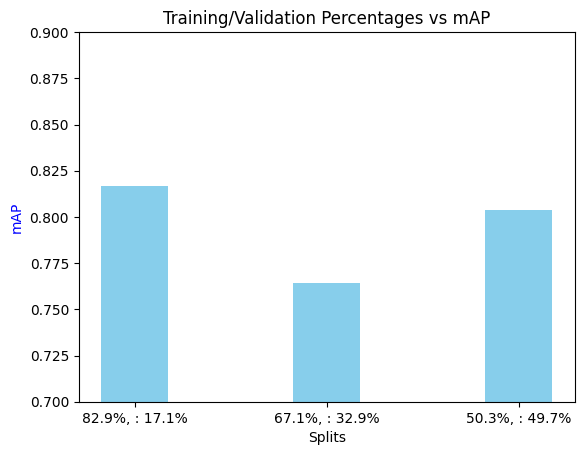


Could not connect session, trying again in 10 seconds



: 

In [44]:
import matplotlib.pyplot as plt

# Data for training and validation split
splits = ['Training', 'Validation']

sumd = 494 + 102

# Separate the percentages into two lists
training_percentages = [494 / sumd, 400 / sumd, 300 / sumd]
validation_percentages = [102 / sumd, 196 / sumd, 296 / sumd]
map_values = [0.817, 0.764, 0.804]

# Combine the training and validation percentages into a single list of labels
percentage_labels = [f'{t*100:.1f}%, : {v*100:.1f}%' for t, v in zip(training_percentages, validation_percentages)]

# Create a bar plot
fig, ax1 = plt.subplots()

# Plotting the mAP values
bar_width = 0.35
index = range(len(map_values))

bar = ax1.bar(index, map_values, bar_width, color='skyblue')

ax1.set_xlabel('Splits')
ax1.set_ylabel('mAP', color='blue')
ax1.set_ylim([0.7, 0.9])
ax1.set_xticks(index)
ax1.set_xticklabels(percentage_labels)

plt.title('Training/Validation Percentages vs mAP')
plt.show()

In [18]:
session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds



RuntimeError: Client is not connected

In [22]:
import fiftyone as fo
import numpy as np
import plotly.graph_objects as go

# Assume dataset is already loaded and model applied

def count_matrix(dataset, pred_field, gt_field, threshold, tag):
    view = dataset.match(F("tags").contains(tag))
    cc, oc, uc = 0, 0, 0
    
    for sample in view:
        gt_count = len(sample[gt_field].detections)
        pred_count = len([d for d in sample[pred_field].detections if d.confidence > threshold])
        
        if pred_count == gt_count:
            cc += 1
        elif pred_count > gt_count:
            oc += 1
        else:
            uc += 1
    
    return cc, oc, uc

# Get unique tags
tags = dataset.distinct("tags")

# Generate matrices for different thresholds
thresholds = np.arange(0, 1.05, 0.05)
matrices = {tag: [count_matrix(dataset, "predictions", "ground_truth", t, tag) for t in thresholds] for tag in tags}

# Print the matrices


# # Create interactive plot
# fig = go.Figure()

# for tag in tags:
#     cc = [m[0] for m in matrices[tag]]
#     oc = [m[1] for m in matrices[tag]]
#     uc = [m[2] for m in matrices[tag]]
    
#     fig.add_trace(go.Scatter(x=thresholds, y=cc, mode='lines', name=f'{tag} Correct'))
#     fig.add_trace(go.Scatter(x=thresholds, y=oc, mode='lines', name=f'{tag} Over'))
#     fig.add_trace(go.Scatter(x=thresholds, y=uc, mode='lines', name=f'{tag} Under'))

# fig.update_layout(
#     title="Counting Errors vs Confidence Threshold by Tag",
#     xaxis_title="Confidence Threshold",
#     yaxis_title="Count",
#     legend_title="Tag and Error Type"
# )

# # Show the plot
# fig.show()


# Keep the script running


FiftyOne App launched. The plot is available in the App's plots panel.
You can interact with the dataset and the plot in the App.
Press Ctrl+C in this terminal when you're done to close the App.


In [23]:
for tag in tags:
    print(f"Tag: {tag}")
    for t, matrix in zip(thresholds, matrices[tag]):
        print(f"Threshold: {t}")
        print(f"Correct: {matrix[0]}, Over: {matrix[1]}, Under: {matrix[2]}")
    print()

Tag: cieling_light_only
Threshold: 0.0
Correct: 15, Over: 10, Under: 13
Threshold: 0.05
Correct: 15, Over: 10, Under: 13
Threshold: 0.1
Correct: 15, Over: 10, Under: 13
Threshold: 0.15000000000000002
Correct: 15, Over: 10, Under: 13
Threshold: 0.2
Correct: 15, Over: 10, Under: 13
Threshold: 0.25
Correct: 15, Over: 10, Under: 13
Threshold: 0.30000000000000004
Correct: 12, Over: 7, Under: 19
Threshold: 0.35000000000000003
Correct: 11, Over: 3, Under: 24
Threshold: 0.4
Correct: 7, Over: 3, Under: 28
Threshold: 0.45
Correct: 7, Over: 0, Under: 31
Threshold: 0.5
Correct: 6, Over: 0, Under: 32
Threshold: 0.55
Correct: 4, Over: 0, Under: 34
Threshold: 0.6000000000000001
Correct: 2, Over: 0, Under: 36
Threshold: 0.65
Correct: 0, Over: 0, Under: 38
Threshold: 0.7000000000000001
Correct: 0, Over: 0, Under: 38
Threshold: 0.75
Correct: 0, Over: 0, Under: 38
Threshold: 0.8
Correct: 0, Over: 0, Under: 38
Threshold: 0.8500000000000001
Correct: 0, Over: 0, Under: 38
Threshold: 0.9
Correct: 0, Over: 0,

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(dataset, field, bins=10):
    # Compute the histogram
    counts, bin_edges = dataset.histogram(field, bins=bins)

    # Plot the histogram
    plt.bar(bin_edges[:-1], counts, width=bin_edges[1] - bin_edges[0])

    # Add labels
    plt.xlabel(field)
    plt.ylabel("Count")
    plt.title(f"{field} Histogram")

    plt.show()

plot_histogram(dataset, "ground_truth.detections.length", bins=10)

In [36]:
import fiftyone as fo
from fiftyone import ViewField as F

# Query for samples with at least 5 false positives
query = F("eval_fp").length() == 5

try:
    # Get the view of samples matching the query
    view = dataset.match(query)

    # Print the filenames and false positive counts
    for sample in view:
        fp_count = sample.eval_fp
        print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    
    # If the above fails, try a different approach
    print("Attempting alternative method...")
    
    for sample in dataset:
        if hasattr(sample, 'eval_fp'):
            fp_count = sample.eval_fp
            if fp_count >= 5:
                print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

An error occurred: PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int, full error: {'ok': 0.0, 'errmsg': 'PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int', 'code': 17124, 'codeName': 'Location17124'}
Attempting alternative method...
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_115133_jpg.rf.9ca3cc133f857c148ddca6fc5f372b26.jpg, False Positives: 8
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_120348_jpg.rf.fb3348f231412c13e4d0656aa94c266e.jpg, False Positives: 6
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\test\images\20230920_120705_jpg.rf.c17776c4ccf0f62425d24f5d5ced0a13.jpg, False Positives: 6
Filename: C:\Users\gbo10\OneDrive\me

In [44]:
dataset.get_field_schema()

OrderedDict([('id', <fiftyone.core.fields.ObjectIdField at 0x2402ac11970>),
             ('filepath', <fiftyone.core.fields.StringField at 0x2402abd57f0>),
             ('tags', <fiftyone.core.fields.ListField at 0x2402abd5370>),
             ('metadata',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5310>),
             ('ground_truth_detections',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abd5f40>),
             ('predictions',
              <fiftyone.core.fields.EmbeddedDocumentField at 0x2402abdfe50>)])

In [49]:
for sample in dataset:
    print(sample.ground_truth_detections)

<Detections: {
    'detections': [
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404a',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.334375, 0.2640625, 0.15234375, 0.1515625],
            'mask': None,
            'confidence': None,
            'index': None,
            'supercategory': 'prawn',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404b',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.2953125, 0.2546875, 0.04921875, 0.04921875],
            'mask': None,
            'confidence': None,
            'index': None,
            'supercategory': 'prawn',
            'iscrowd': 0,
        }>,
        <Detection: {
            'id': '66d9f8ba4ba0e662c8d4404c',
            'attributes': {},
            'tags': [],
            'label': 'prawn',
            'bounding_box': [0.6, 0.4

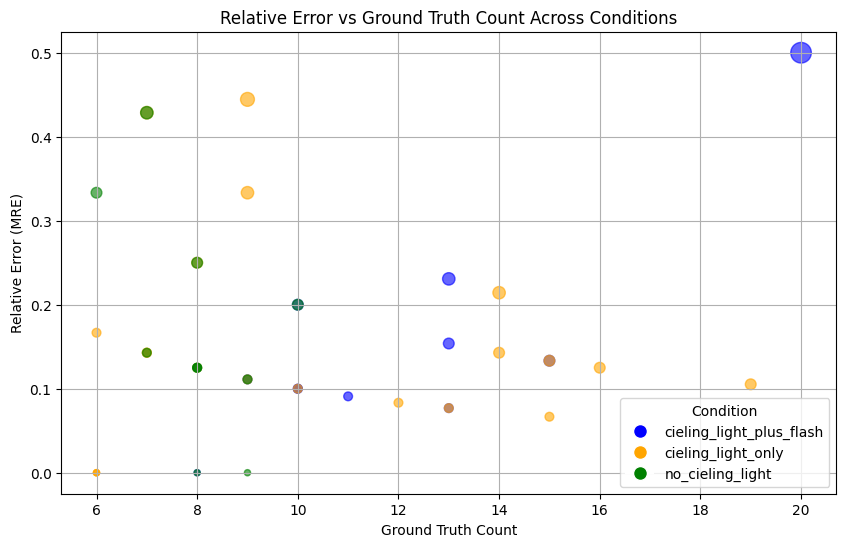

In [128]:
import matplotlib.pyplot as plt

# Conditions and corresponding colors
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]
colors = {'cieling_light_plus_flash': 'blue', 'cieling_light_only': 'orange', 'no_cieling_light': 'green'}

# Lists to store values for plotting
ground_truth_counts = []
relative_errors = []
absolute_errors = []
condition_labels = []

for condition in conditions:
    view = dataset.match_tags(condition)
    
    for sample in view:
        gt_count = len(sample.ground_truth.detections)
        if gt_count > 5:    
            # Check if ground_truth_detections is not None before accessing detections
           
                
            
            pred_count = len(sample.predictions.detections)
            abs_error = abs(pred_count - gt_count)
            
            # Calculate relative error (avoid division by zero)
            if gt_count > 0:
                rel_error = abs_error / gt_count
            else:
                rel_error = 0
            
            ground_truth_counts.append(gt_count)
            relative_errors.append(rel_error)
            absolute_errors.append(abs_error)
            condition_labels.append(condition)

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ground_truth_counts, relative_errors, 
                      c=[colors[label] for label in condition_labels], 
                      s=[(ae + 1) * 20 for ae in absolute_errors],  # Scale the size for visibility
                      alpha=0.6)

plt.xlabel('Ground Truth Count')
plt.ylabel('Relative Error (MRE)')
plt.title('Relative Error vs Ground Truth Count Across Conditions')

# Create a legend with colors representing conditions
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=color, markersize=10) 
                    for label, color in colors.items()], 
           labels=conditions, title="Condition")

plt.grid(True)
plt.show()


In [ ]:
results.plot_pr_curves()

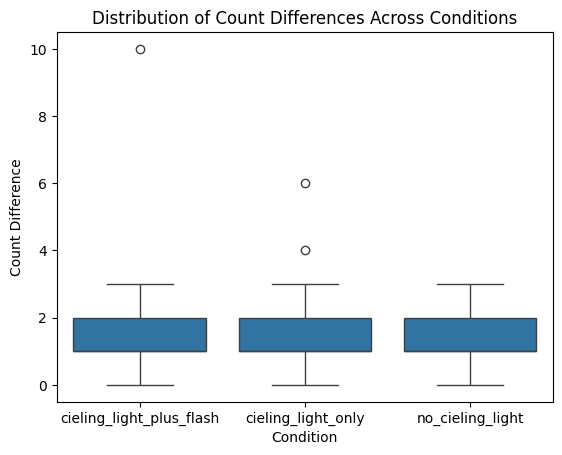

In [119]:
import seaborn as sns
import pandas as pd
count_diffs = []

for condition in conditions:
    view = dataset.match_tags(condition)
    for sample in view:
        pred_count = len(sample.predictions.detections)
        gt_count = len(sample.ground_truth.detections)
        
        
        count_diffs.append({"Condition": condition, "Count Difference":abs( pred_count - gt_count)})

df = pd.DataFrame(count_diffs)

# Create a box plot using Seaborn
sns.boxplot(x="Condition", y="Count Difference", data=df)
plt.title("Distribution of Count Differences Across Conditions")
plt.show()


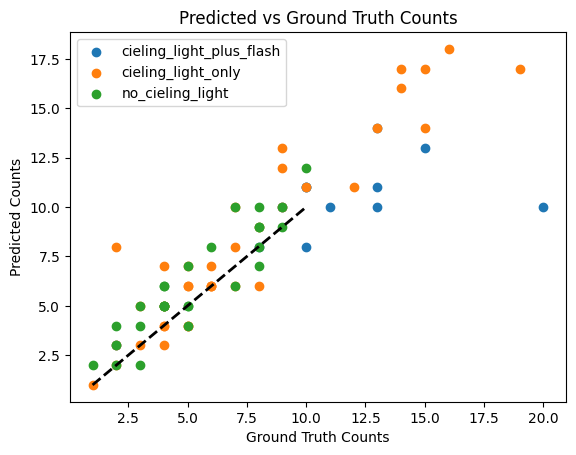

In [120]:
import matplotlib.pyplot as plt

# Conditions and corresponding colors
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

for condition in conditions:
    view = dataset.match_tags(condition)
    gt_counts = []
    pred_counts = []

    for sample in view:
        # Append ground truth count if ground truth detections exist
        gt_count = len(sample.ground_truth.detections)
        

        gt_counts.append(gt_count)  # Append ground truth count
        pred_counts.append(len(sample.predictions.detections))  # Append predicted count

    # Scatter plot for this condition
    plt.scatter(gt_counts, pred_counts, label=condition)

# Plot y=x line for reference
plt.plot([min(gt_counts), max(gt_counts)], [min(gt_counts), max(gt_counts)], 'k--', lw=2)

# Labels and title
plt.xlabel('Ground Truth Counts')
plt.ylabel('Predicted Counts')
plt.title('Predicted vs Ground Truth Counts')
plt.legend()
plt.show()


In [129]:
for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    pred_count = len(sample.predictions.detections)
    
    # Calculate the difference (overprediction if positive)
    sample["count_diff"] = abs(pred_count - gt_count)
    sample.save()

# Step 2: Launch FiftyOne app with dynamic filtering via slider


In [130]:
for sample in dataset:
    gt_count = len(sample.ground_truth.detections)
    pred_count = len(sample.predictions.detections)
    
    # Calculate the difference (overprediction if positive)
    sample['MRE']=abs(pred_count - gt_count)/gt_count
    sample.save()
    

In [123]:
session = fo.launch_app(dataset)

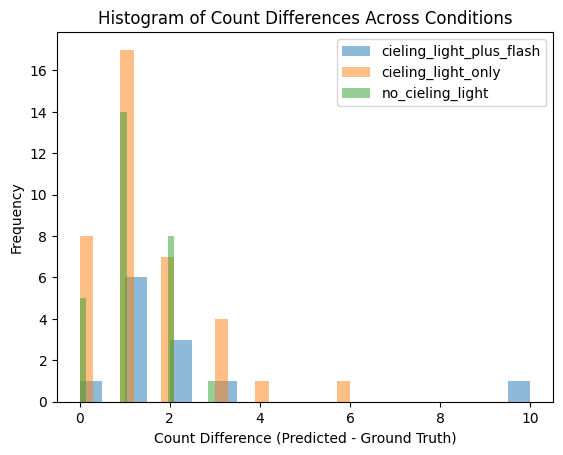

In [122]:
for condition in conditions:
    view = dataset.match_tags(condition)
    count_diffs = []

    for sample in view:
        pred_count = len(sample.predictions.detections)

        
        gt_count = len(sample.ground_truth.detections)
       

            
        
        count_diffs.append(abs(pred_count - gt_count))
    
    plt.hist(count_diffs, bins=20, alpha=0.5, label=condition)

plt.xlabel('Count Difference (Predicted - Ground Truth)')
plt.ylabel('Frequency')
plt.title('Histogram of Count Differences Across Conditions')
plt.legend()
plt.show()


In [126]:
from scipy import stats

# Function to compute count differences for each condition
def get_filtered_counts(view, field, threshold=6):
    # Filter counts where ground truth count > threshold
    counts = []
    for sample in view:
       

        gt_count = len(sample["ground_truth"].detections)
        

        
        if gt_count > threshold:
            counts.append(len(sample[field].detections))
        

    return counts

# Conditions
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

# Iterate through each condition to compute statistics and test significance
for condition in conditions:
    view = dataset.match_tags(condition)
    
    

    # Get filtered ground truth and prediction counts where ground truth count > 6
    ground_truth_counts = get_filtered_counts(view, "ground_truth")
    prediction_counts = get_filtered_counts(view, "predictions")

    # Ensure there are counts left after filtering
    if len(ground_truth_counts) == 0 or len(prediction_counts) == 0:
        print(f"\nSkipping {condition} as no samples have ground truth counts > 6")
        continue

    # Shapiro-Wilk test for normality
    print(f"\nNormality test for {condition}:")
    stat_gt, p_gt = stats.shapiro(ground_truth_counts)
    stat_pred, p_pred = stats.shapiro(prediction_counts)
    
    print(f"  Ground truth normality p-value: {p_gt}")
    print(f"  Predictions normality p-value: {p_pred}")

    # Paired t-test if data is normally distributed
    if p_gt > 0.05 and p_pred > 0.05:
        print(f"\nRunning paired t-test for {condition}:")
        t_stat, t_p_value = stats.ttest_rel(ground_truth_counts, prediction_counts)
        print(f"  T-statistic: {t_stat}, P-value: {t_p_value}")

        if t_p_value > 0.05:
            print(f"The difference is NOT statistically significant for {condition} (p > 0.05)")
        else:
            print(f"The difference IS statistically significant for {condition} (p <= 0.05)")
    else:
        # Wilcoxon signed-rank test if data is not normally distributed
        print(f"\nRunning Wilcoxon signed-rank test for {condition}:")
        w_stat, w_p_value = stats.wilcoxon(ground_truth_counts, prediction_counts)
        print(f"  W-statistic: {w_stat}, P-value: {w_p_value}")

        if w_p_value > 0.05:
            print(f"The difference is NOT statistically significant for {condition} (p > 0.05)")
        else:
            print(f"The difference IS statistically significant for {condition} (p <= 0.05)")




Normality test for cieling_light_plus_flash:
  Ground truth normality p-value: 0.10981249064207077
  Predictions normality p-value: 0.24265237152576447

Running paired t-test for cieling_light_plus_flash:
  T-statistic: 1.5051533894137556, P-value: 0.1631983327462786
The difference is NOT statistically significant for cieling_light_plus_flash (p > 0.05)

Normality test for cieling_light_only:
  Ground truth normality p-value: 0.09942509979009628
  Predictions normality p-value: 0.3441392481327057

Running paired t-test for cieling_light_only:
  T-statistic: -2.2443344307471285, P-value: 0.03930588763859531
The difference IS statistically significant for cieling_light_only (p <= 0.05)

Normality test for no_cieling_light:
  Ground truth normality p-value: 0.14879806339740753
  Predictions normality p-value: 0.7173653841018677

Running paired t-test for no_cieling_light:
  T-statistic: -1.9215378456610457, P-value: 0.08684229054535088
The difference is NOT statistically significant for 

In [82]:
import numpy as np

def compute_statistics(view, detections):
    counts = [len(sample[detections].detections) for sample in view]
    total_count = np.sum(counts)
    mean_count = np.mean(counts)
    median_count = np.median(counts)
    std_dev_count = np.std(counts)
    min_count = np.min(counts)
    max_count = np.max(counts)

    return {
        "total_count": total_count,
        "mean_count": mean_count,
        "median_count": median_count,
        "std_dev_count": std_dev_count,
        "min_count": min_count,
        "max_count": max_count,
    }

# Conditions
conditions = ["cieling_light_plus_flash", "cieling_light_only", "no_cieling_light"]

# Compute statistics for each condition
for condition in conditions:
    view = dataset.match_tags(condition)

    # Compute statistics for ground truths
    ground_truth_stats = compute_statistics(view, "ground_truth")
    print(f"\nGround Truth Statistics for {condition}:")
    for key, value in ground_truth_stats.items():
        print(f"{key}: {value}")

    # Compute statistics for predictions
    prediction_stats = compute_statistics(view, "predictions")
    print(f"\nPrediction Statistics for {condition}:")
    for key, value in prediction_stats.items():
        print(f"{key}: {value}")




Ground Truth Statistics for cieling_light_plus_flash:
total_count: 132
mean_count: 11.0
median_count: 10.5
std_dev_count: 3.8078865529319543
min_count: 2
max_count: 18

Prediction Statistics for cieling_light_plus_flash:
total_count: 119
mean_count: 9.916666666666666
median_count: 10.0
std_dev_count: 2.6601482832520613
min_count: 3
max_count: 14

Ground Truth Statistics for cieling_light_only:
total_count: 273
mean_count: 7.184210526315789
median_count: 6.0
std_dev_count: 4.291087846111647
min_count: 1
max_count: 19

Prediction Statistics for cieling_light_only:
total_count: 311
mean_count: 8.18421052631579
median_count: 6.5
std_dev_count: 4.667103593844759
min_count: 1
max_count: 18

Ground Truth Statistics for no_cieling_light:
total_count: 147
mean_count: 5.25
median_count: 4.5
std_dev_count: 2.473069232466295
min_count: 1
max_count: 10

Prediction Statistics for no_cieling_light:
total_count: 173
mean_count: 6.178571428571429
median_count: 5.5
std_dev_count: 2.6464743585782657
min

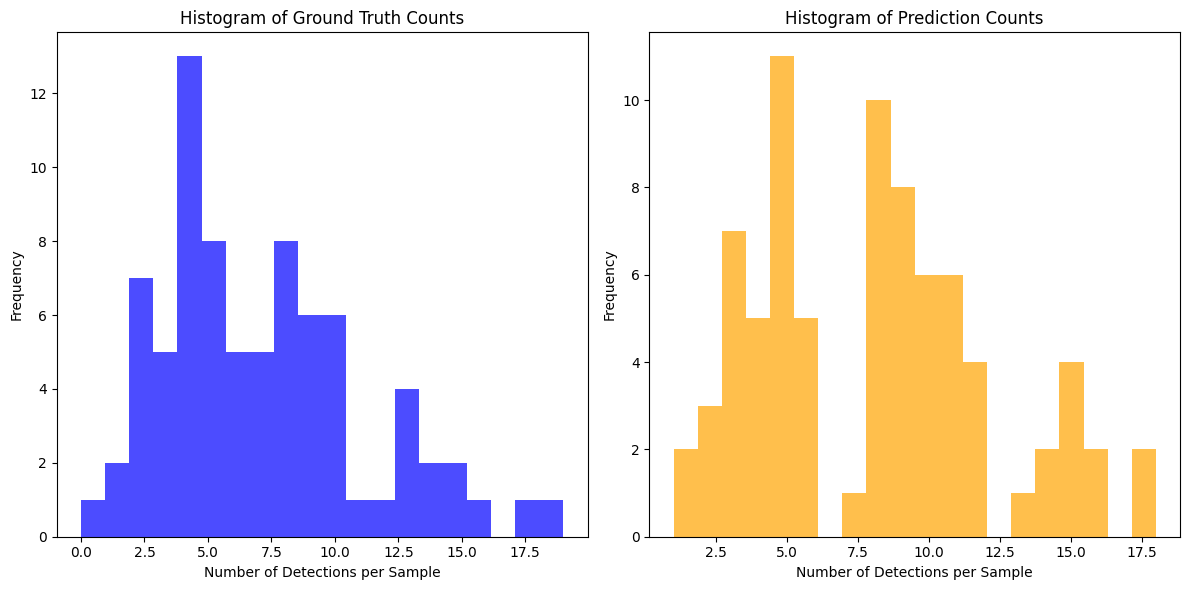

In [43]:
import matplotlib.pyplot as plt

def get_counts(detections):
    return [len(sample[detections].detections) for sample in dataset]

# Get the number of detections per sample for ground truths
ground_truth_counts = get_counts("ground_truth")

# Get the number of detections per sample for predictions
prediction_counts = get_counts("predictions")

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for ground truths
plt.subplot(1, 2, 1)
plt.hist(ground_truth_counts, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Ground Truth Counts')
plt.xlabel('Number of Detections per Sample')
plt.ylabel('Frequency')

# Histogram for predictions
plt.subplot(1, 2, 2)
plt.hist(prediction_counts, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Prediction Counts')
plt.xlabel('Number of Detections per Sample')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [61]:
import os
import cv2

from tqdm import tqdm

def count_files_and_video_duration(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.wmv')
    
    image_count = 0
    total_video_time = 0.0

    for filename in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        if filename.lower().endswith(image_extensions):
            image_count += 1
        elif filename.lower().endswith(video_extensions):
            video = cv2.VideoCapture(file_path)
            if video.isOpened():
                fps = video.get(cv2.CAP_PROP_FPS)
                frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)
                duration = frame_count / fps
                total_video_time += duration

    return image_count, total_video_time

def analyze_folders(folder_paths):
    for folder in folder_paths:
        images, video_time = count_files_and_video_duration(folder)
        print(f"Folder: {folder}")
        print(f"Number of images: {images}")
        print(f"Total video time (in seconds): {video_time:.2f}")
        print()

folder_paths = [r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/28.9"]
analyze_folders(folder_paths)


100%|██████████| 10/10 [00:00<00:00, 53.47it/s]


Folder: C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/28.9
Number of images: 8
Total video time (in seconds): 471.27

